Accuracy: 0.9165
Digit 0


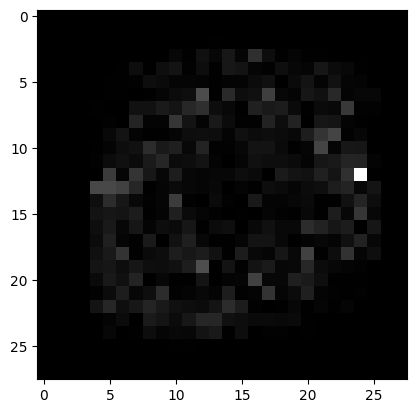

Digit 1


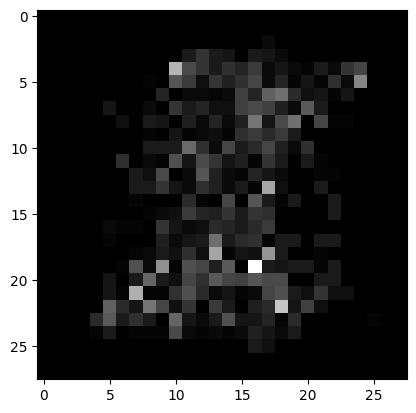

Digit 2


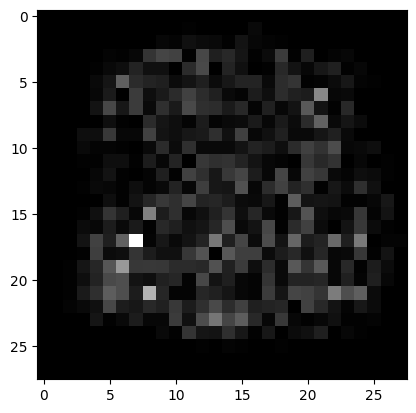

Digit 3


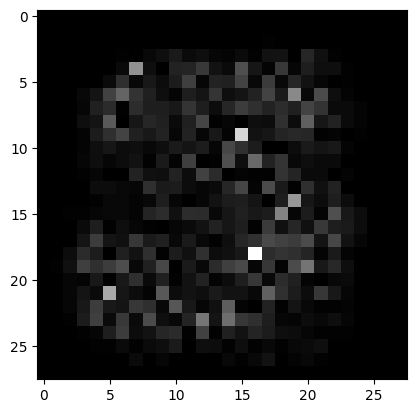

Digit 4


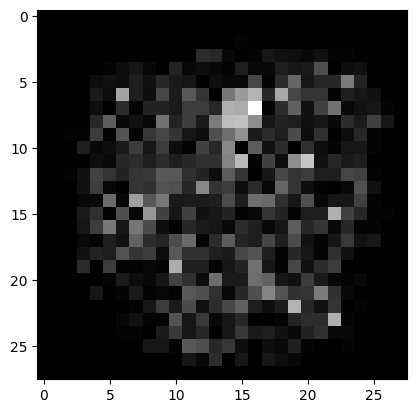

Digit 5


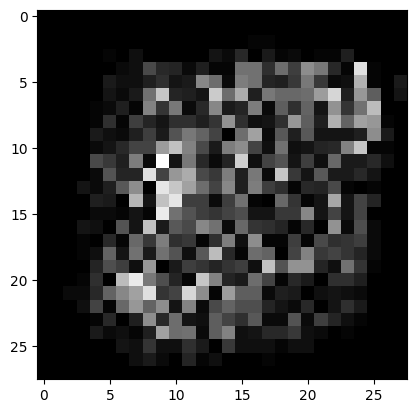

Digit 6


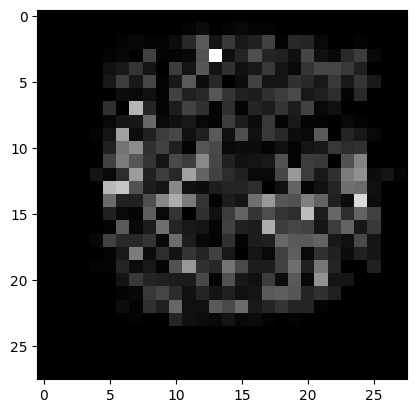

Digit 7


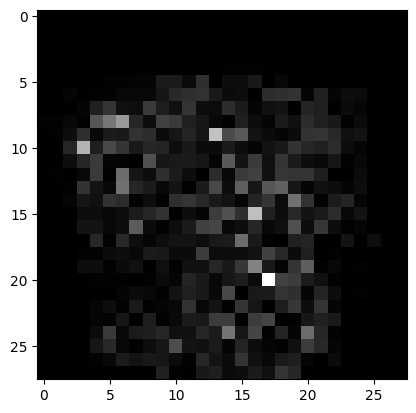

Digit 8


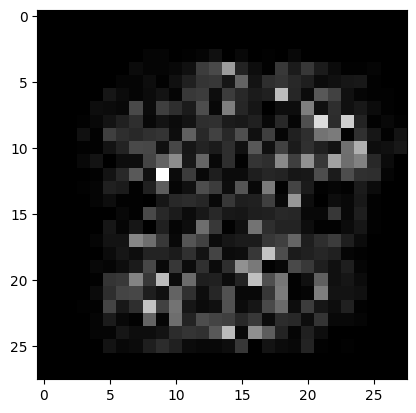

Digit 9


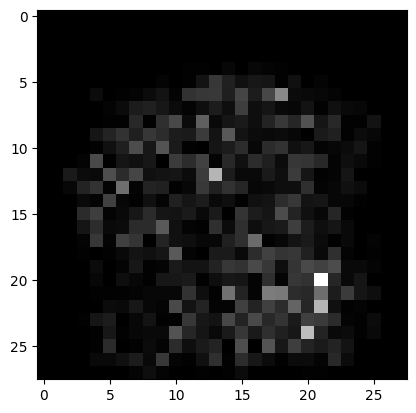

In [44]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from eli5.sklearn import PermutationImportance

import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Show the important pixels for each digit using eli5
for i in range(10):
    print('Digit', i)
    perm = PermutationImportance(model, random_state=42).fit(X_test[y_test == str(i)], y_test[y_test == str(i)])
    plt.imshow(np.abs(perm.feature_importances_).reshape(28, 28), cmap='gray')
    plt.show()
